In [821]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import sys
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display, HTML
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
sys.path.append(r'C:\Users\mostafa\AI&ML\File-important')

# Import the remove_outliers_iqr function
from outliers import remove_outliers_iqr

In [822]:


image_path = r"Time-Series-Analysis.jpg"

display(HTML(f'<div style="text-align: center;margin-top:20px"><img src="{image_path}" style="max-width: 100%; height: auto;" /></div>'))


In [823]:
pd.set_option('display.max_colwidth', None)
df=pd.read_csv('DataStcok.csv')
exp=pd.read_csv(r'Stock_Data_Column_Descriptions.csv')
exp

Column Name  \
0        symbol   
1          date   
2         close   
3          high   
4           low   
5          open   
6        volume   
7      adjClose   
8       adjHigh   
9        adjLow   
10      adjOpen   
11    adjVolume   
12      divCash   
13  splitFactor   

                                                                                         Description  
0                                            The stock symbol or ticker (e.g., AAPL for Apple Inc.).  
1                                                                       The date of the trading day.  
2                                                  The closing price of the stock on the given date.  
3                                        The highest price the stock reached during the trading day.  
4                                         The lowest price the stock reached during the trading day.  
5                                                  The opening price of the stock on the given date.  
6                                          The total number of shares traded during the trading day.  
7   The adjusted closing price, accounting for stock splits, dividends, and other corporate actions.  
8               The adjusted highest price during the trading day, accounting for corporate actions.  
9                The adjusted lowest price during the trading day, accounting for corporate actions.  
10                                     The adjusted opening price, accounting for corporate actions.  
11                           The adjusted volume of shares traded, accounting for corporate actions.  
12                                               The cash dividend paid per share on the given date.  
13                          The factor by which the stock was split (e.g., 2.0 for a 2-for-1 split).

## Overview

**This dataset provides a comprehensive record of Apple Inc.'s stock price changes over the past 5 years => 1822 Day Business-Week. It includes essential columns such as the date, opening price, highest price of the day, lowest price of the day, closing price, adjusted closing price, and trading volume and adjHigh ,adjOpen,adjLow**

# EDA

In [824]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  1267 non-null   int64  
 1   Unnamed: 0    1267 non-null   int64  
 2   symbol        1150 non-null   object 
 3   date          1267 non-null   object 
 4   close         1267 non-null   float64
 5   high          1267 non-null   float64
 6   low           1267 non-null   float64
 7   open          1267 non-null   float64
 8   volume        1267 non-null   int64  
 9   adjClose      1267 non-null   float64
 10  adjVolume     1267 non-null   int64  
 11  divCash       1267 non-null   float64
 12  splitFactor   1246 non-null   float64
dtypes: float64(7), int64(4), object(2)
memory usage: 128.8+ KB


In [825]:

df.head()

Unnamed: 0.1  Unnamed: 0 symbol                       date    close  \
0             0           0   AAPL  2015-05-27 00:00:00+00:00  132.045   
1             1           1   AAPL  2015-05-28 00:00:00+00:00  131.780   
2             2           2   AAPL  2015-05-29 00:00:00+00:00  130.280   
3             3           3   AAPL  2015-06-01 00:00:00+00:00  130.535   
4             4           4   AAPL  2015-06-02 00:00:00+00:00  129.960   

      high     low    open    volume    adjClose  adjVolume  divCash  \
0  132.260  130.05  130.34  45833246  121.682558   45833246      0.0   
1  131.950  131.10  131.86  30733309  121.438354   30733309      0.0   
2  131.450  129.90  131.23  50884452  120.056069   50884452      0.0   
3  131.390  130.05  131.20  32112797  120.291057   32112797      0.0   
4  130.655  129.32  129.86  33667627  119.761181   33667627      0.0   

   splitFactor  
0          1.0  
1          NaN  
2          1.0  
3          1.0  
4          NaN

In [826]:
df.tail()

Unnamed: 0.1  Unnamed: 0 symbol                       date   close  \
1262          1262        1145   AAPL  2019-12-06 00:00:00+00:03  270.71   
1263          1263        1146   AAPL  2019-12-06 00:00:00+00:04  270.71   
1264          1264        1147   AAPL  2019-12-06 00:00:00+00:05  270.71   
1265          1265        1148   AAPL  2019-12-06 00:00:00+00:06  270.71   
1266          1266        1149   AAPL  2019-12-06 00:00:00+00:07  270.71   

       high    low    open    volume    adjClose  adjVolume  divCash  \
1262  271.0  267.3  267.48  26547493  269.348058   26547493      0.0   
1263  271.0  267.3  267.48  26547493  269.348058   26547493      0.0   
1264  271.0  267.3  267.48  26547493  269.348058   26547493      0.0   
1265  271.0  267.3  267.48  26547493  269.348058   26547493      0.0   
1266  271.0  267.3  267.48  26547493  269.348058   26547493      0.0   

      splitFactor  
1262          1.0  
1263          1.0  
1264          1.0  
1265          1.0  
1266          1.0

In [827]:
df.sample(5)

Unnamed: 0.1  Unnamed: 0 symbol                       date   close  \
37             37          37    NaN  2015-07-20 00:00:00+00:00  132.07   
222           222         222   AAPL  2016-04-13 00:00:00+00:00  112.04   
170           170         170   AAPL  2016-01-28 00:00:00+00:00   94.09   
861           861         861   AAPL  2018-10-24 00:00:00+00:00  215.09   
276           276         276   AAPL  2016-06-29 00:00:00+00:00   94.40   

       high     low    open    volume    adjClose  adjVolume  divCash  \
37   132.97  130.70  130.97  58900203  121.705596   58900203      0.0   
222  112.34  110.80  110.80  33257316  104.720515   33257316      0.0   
170   94.52   92.39   93.79  55678825   87.472309   55678825      0.0   
861  224.23  214.54  222.60  40925163  210.094649   40925163      0.0   
276   94.55   93.63   93.97  36531006   88.772313   36531006      0.0   

     splitFactor  
37           1.0  
222          1.0  
170          1.0  
861          1.0  
276          1.0

In [828]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'symbol', 'date', 'close', 'high', 'low',
       'open', 'volume', 'adjClose', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [829]:
df.shape

(1267, 13)

In [830]:
df.size

16471

In [831]:
df.dtypes

Unnamed: 0.1      int64
Unnamed: 0        int64
symbol           object
date             object
close           float64
high            float64
low             float64
open            float64
volume            int64
adjClose        float64
adjVolume         int64
divCash         float64
splitFactor     float64
dtype: object

In [832]:
df.isna().sum()

Unnamed: 0.1      0
Unnamed: 0        0
symbol          117
date              0
close             0
high              0
low               0
open              0
volume            0
adjClose          0
adjVolume         0
divCash           0
splitFactor      21
dtype: int64

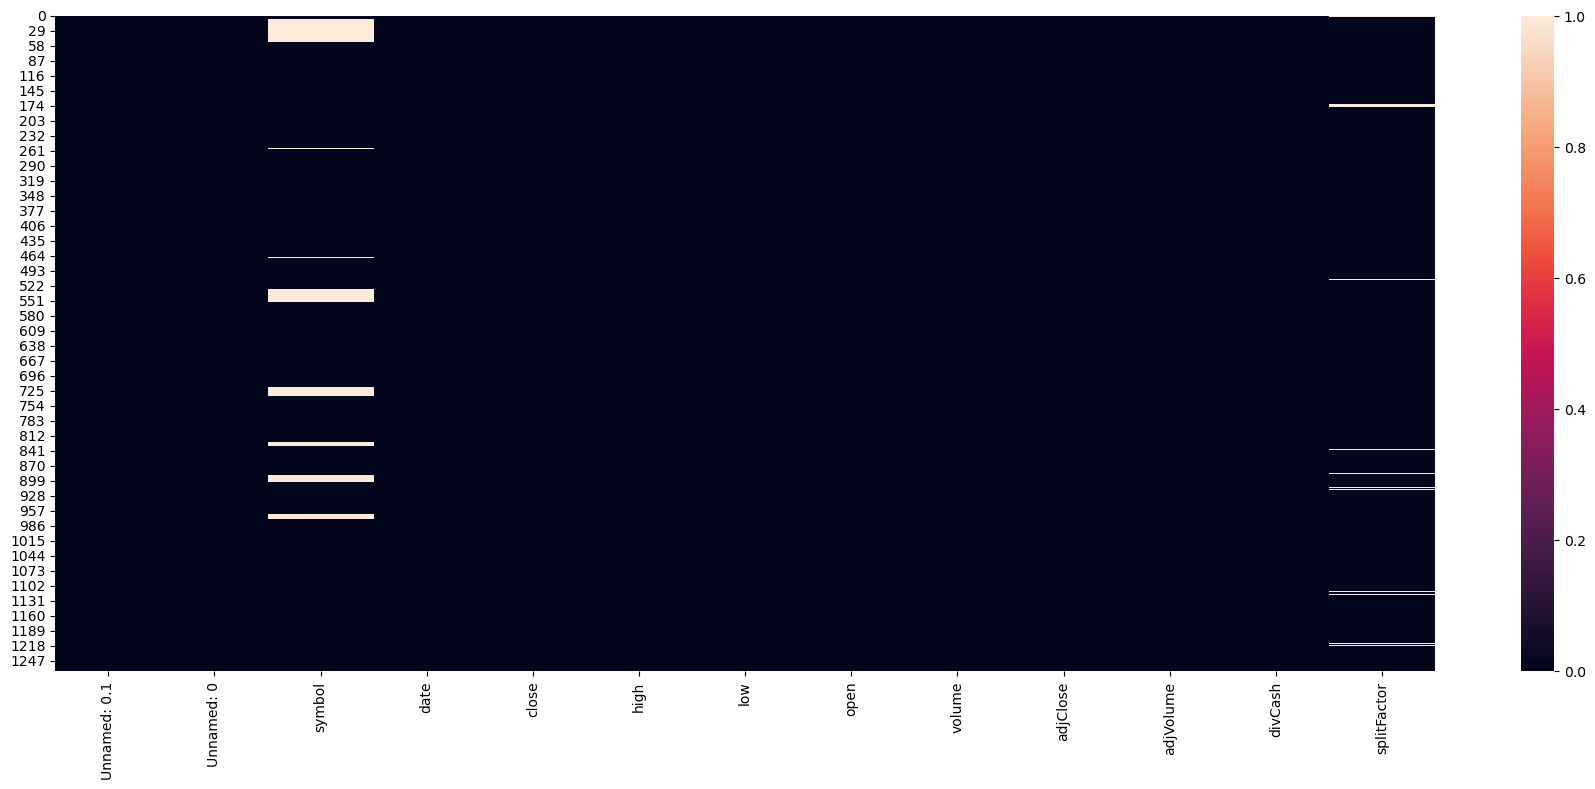

In [833]:
plt.figure(figsize=(18,8))
sns.heatmap(df.isna())
plt.tight_layout()

In [834]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1262    False
1263    False
1264    False
1265    False
1266    False
Length: 1267, dtype: bool

# PreProcessing
  - **cleaning & Outliers**
  - **Preparation & Transformation**
  

In [835]:
df.drop(columns=['Unnamed: 0','symbol'],inplace=True)

In [836]:
df.drop(columns=['Unnamed: 0.1'],inplace=True)

In [837]:
df.drop(columns=['divCash'],inplace=True)

In [838]:
df['splitFactor'].describe()

count    1246.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: splitFactor, dtype: float64

In [839]:
mean=df['splitFactor'].mean()
df['splitFactor'].fillna(mean,inplace=True)

C:\Users\mostafa\AppData\Local\Temp\ipykernel_16100\1740944488.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [840]:
volume_count=df['adjVolume']==df['volume']
volume_count.value_counts()

True    1267
Name: count, dtype: int64

In [841]:
df.drop(columns=['adjVolume'],inplace=True)

In [842]:
df.sample(5)

date   close    high     low     open    volume  \
235  2016-05-02 00:00:00+00:00   93.64   94.08   92.40   93.965  48160104   
582  2017-09-15 00:00:00+00:00  159.88  160.97  158.00  158.470  48203642   
912  2019-01-09 00:00:00+00:00  153.31  154.53  149.63  151.290  45099081   
391  2016-12-12 00:00:00+00:00  113.30  115.00  112.49  113.290  26374377   
477  2017-04-18 00:00:00+00:00  141.20  142.04  141.11  141.410  14697544   

       adjClose  splitFactor  
235   87.522572          1.0  
582  153.842642          1.0  
912  150.273784          1.0  
391  107.675151          1.0  
477  134.767658          1.0

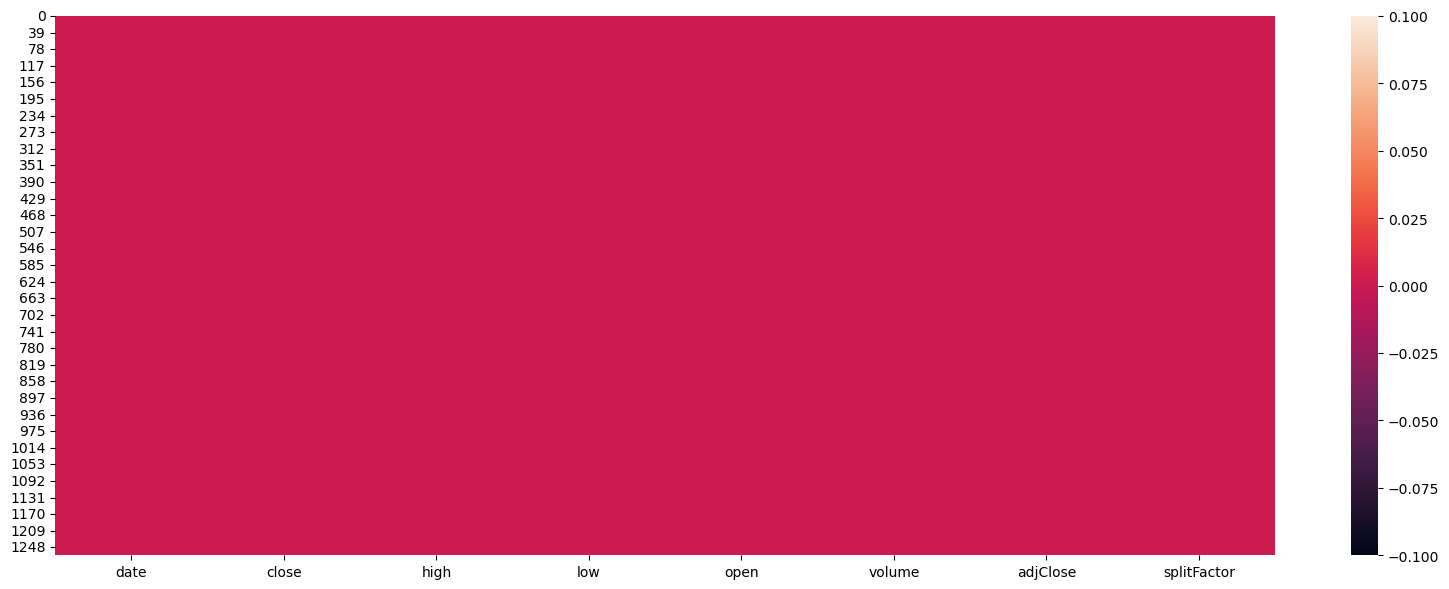

In [843]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isna())
plt.tight_layout()

In [844]:
df.drop_duplicates(inplace=True)

### **let's Check  Outliers**

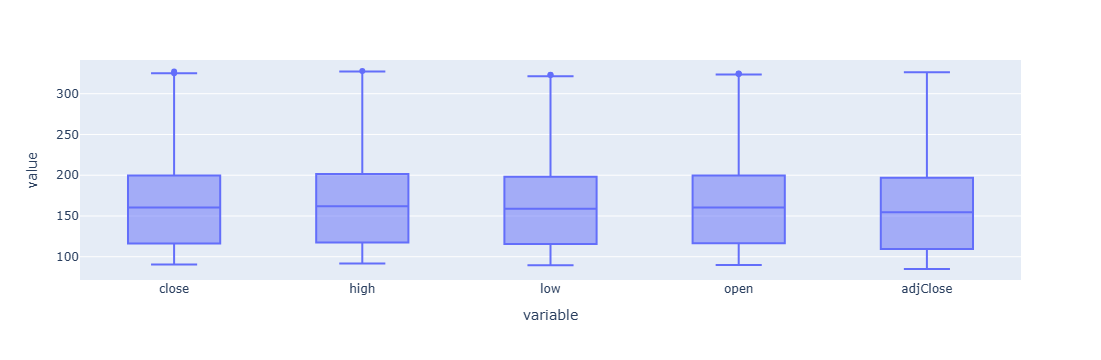

In [845]:
ex.box(df[['close','high','low','open','adjClose']])


## **Preparation & Transformation**

In [846]:
df.dtypes

date            object
close          float64
high           float64
low            float64
open           float64
volume           int64
adjClose       float64
splitFactor    float64
dtype: object

In [847]:
df['date'] = pd.to_datetime(df['date'],utc=True)


In [848]:
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [849]:
df['date'].max()-df['date'].min()


Timedelta('1822 days 00:00:00')

In [850]:
df['date'].dt.microsecond.value_counts()

date
0    1258
Name: count, dtype: int64

In [851]:
df['date'].dt.second.value_counts()

date
0    1258
Name: count, dtype: int64

In [852]:
df['date'].dt.nanosecond.value_counts()

date
0    1258
Name: count, dtype: int64

In [853]:
df['date'].dt.minute.value_counts()


date
0     1251
59       1
58       1
57       1
56       1
55       1
54       1
53       1
Name: count, dtype: int64

In [854]:
df['date'].dt.hour.value_counts()


date
0     1251
23       7
Name: count, dtype: int64

In [855]:
df.insert(1,'Year',df['date'].dt.year)

In [856]:
df.insert(2,'Year_Quarter', df['date'].dt.year.astype(str) + '-Q' + df['date'].dt.quarter.astype(str))

In [857]:
df.insert(3,'Day-name',df['date'].dt.day.astype(str) + '-' + df['date'].dt.day_name())


In [858]:
df.insert(10,'Price-Adjustment',df['close']-df['adjClose'])

In [859]:
df.set_index('date',inplace=True)

In [860]:
describe_values=df.describe()

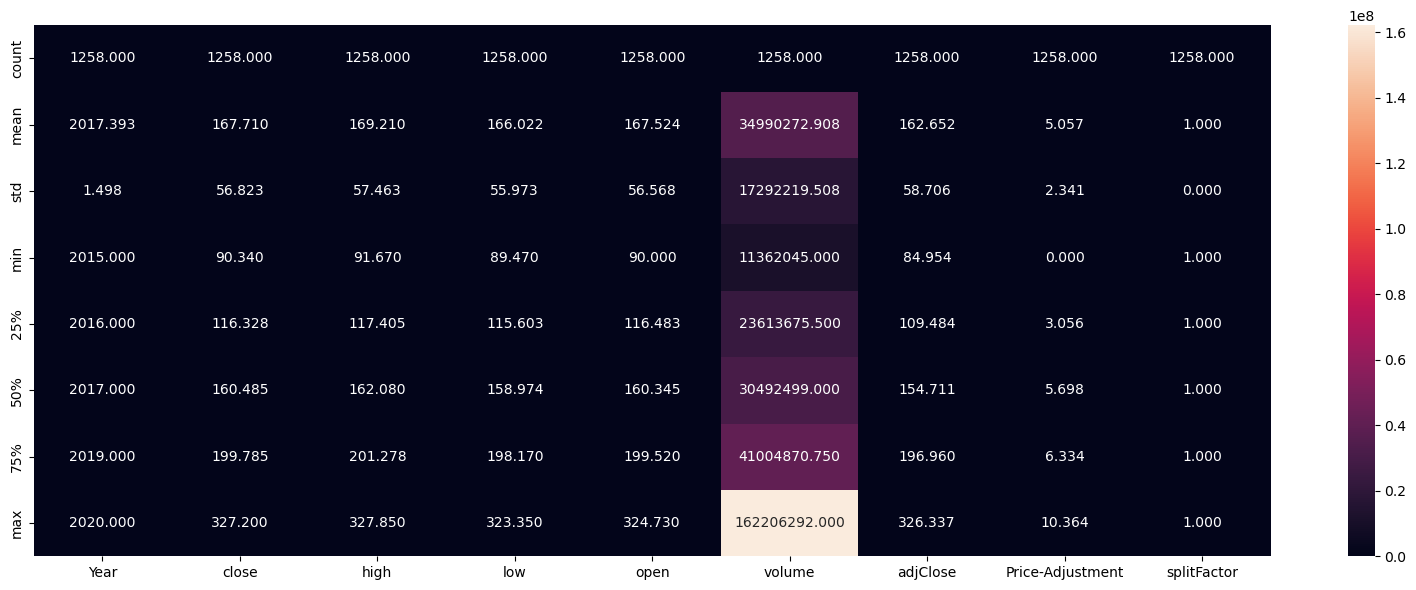

In [861]:
plt.figure(figsize=(16,6))
sns.heatmap(describe_values,fmt='0.3f',annot=True)
plt.tight_layout()

# - **Advanced EDA**

## Let's Advanced EDA => -------------------------Time Series Analysis-----------------------------------

In [862]:
piv=pd.pivot_table(df,index=['Year_Quarter'],values=['close','adjClose','Price-Adjustment','high','low','open'],aggfunc='mean').round(3)


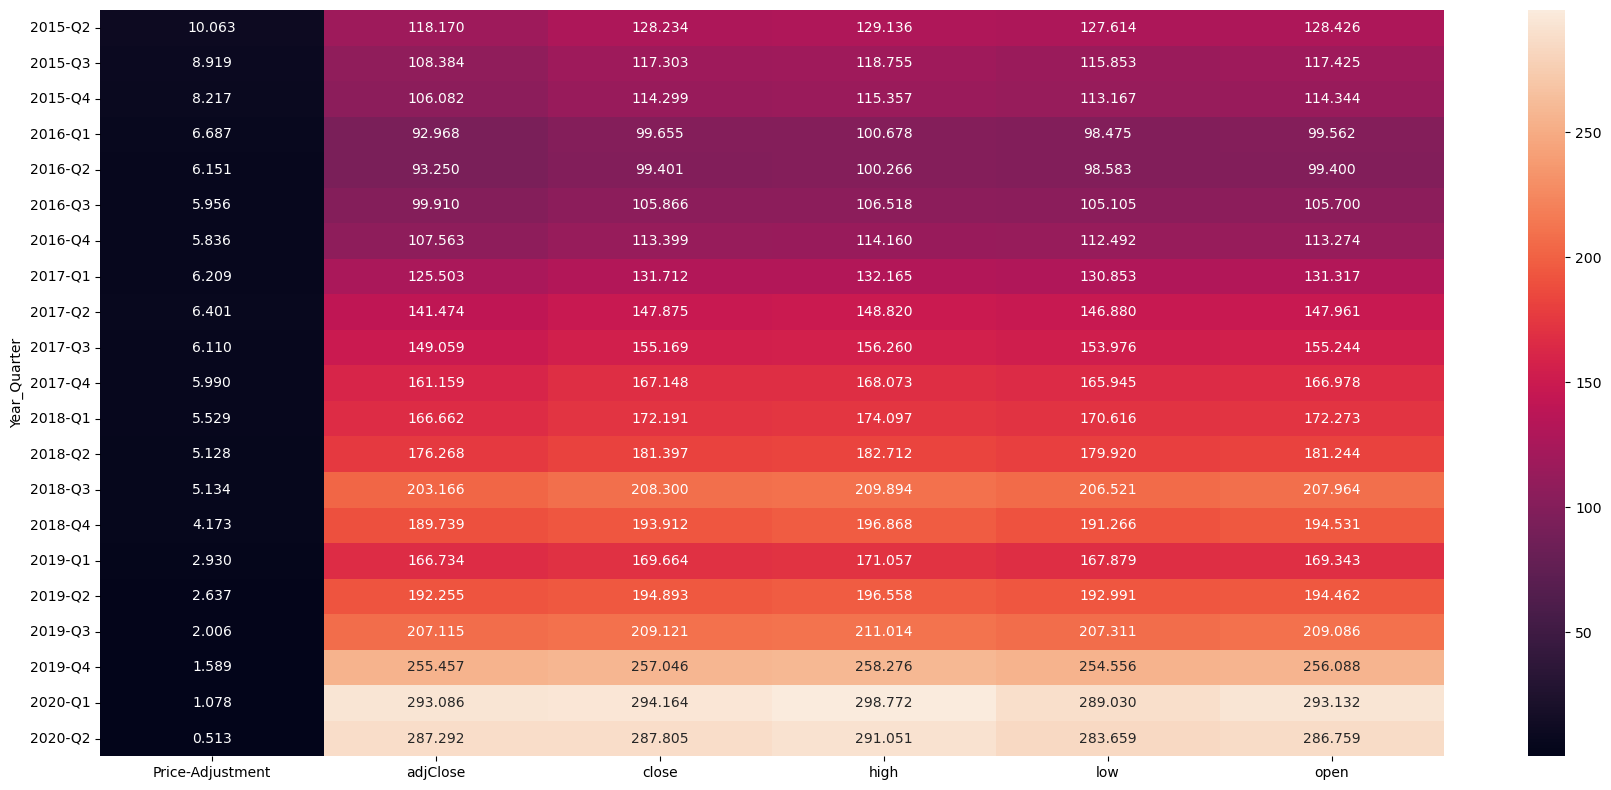

In [863]:
plt.figure(figsize=(18,8))
sns.heatmap(piv,annot=True,fmt='0.3f')
plt.tight_layout()

## Check Trends

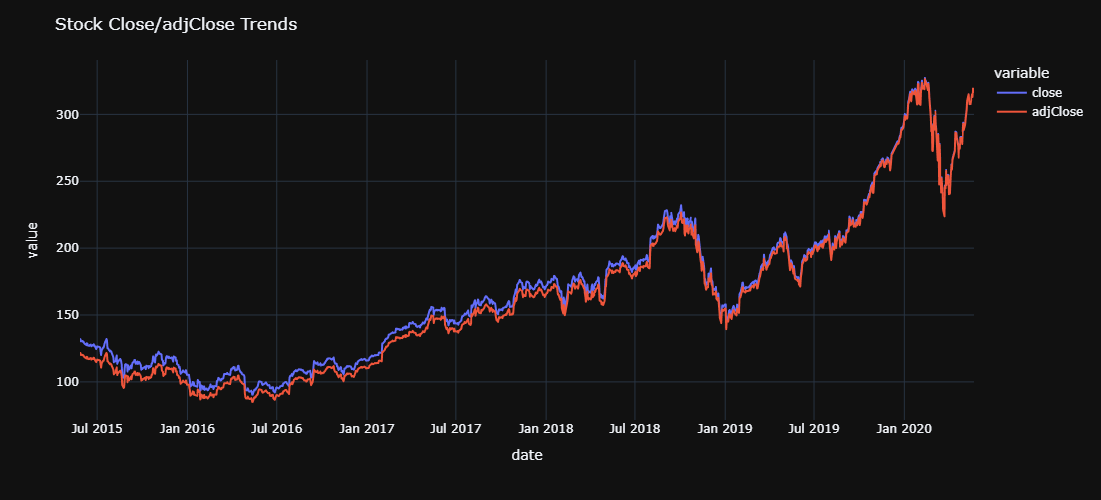

In [864]:
fig=ex.line(df,y=['close','adjClose'],height=500,width=1100)
fig.update_layout(
    template='plotly_dark',
    title_text="Stock Close/adjClose Trends ")


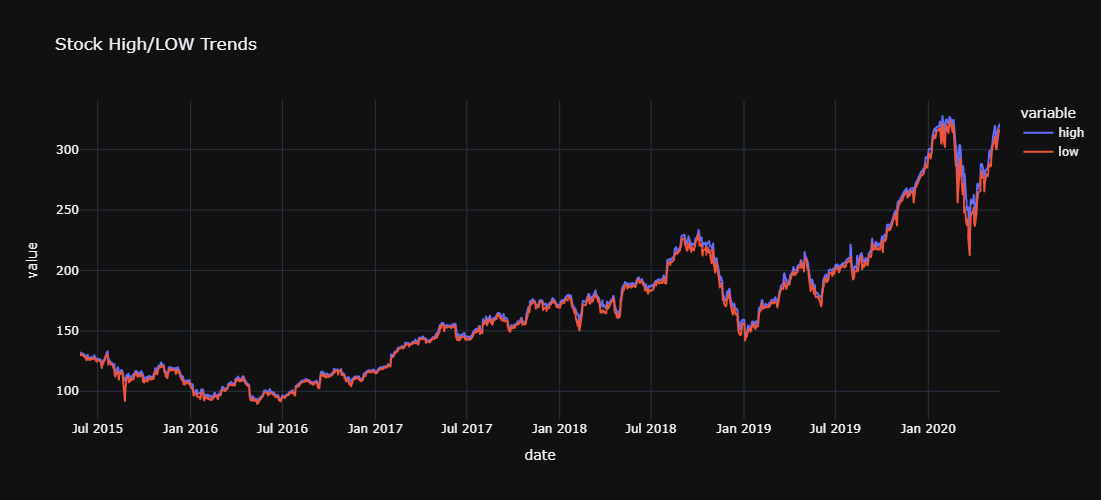

In [865]:
fig=ex.line(df,  y=['high','low'], title='Stock Low / High Price in Trends', height=500, width=1100)
fig.update_layout(
    template='plotly_dark',
    title_text="Stock High/LOW Trends ")


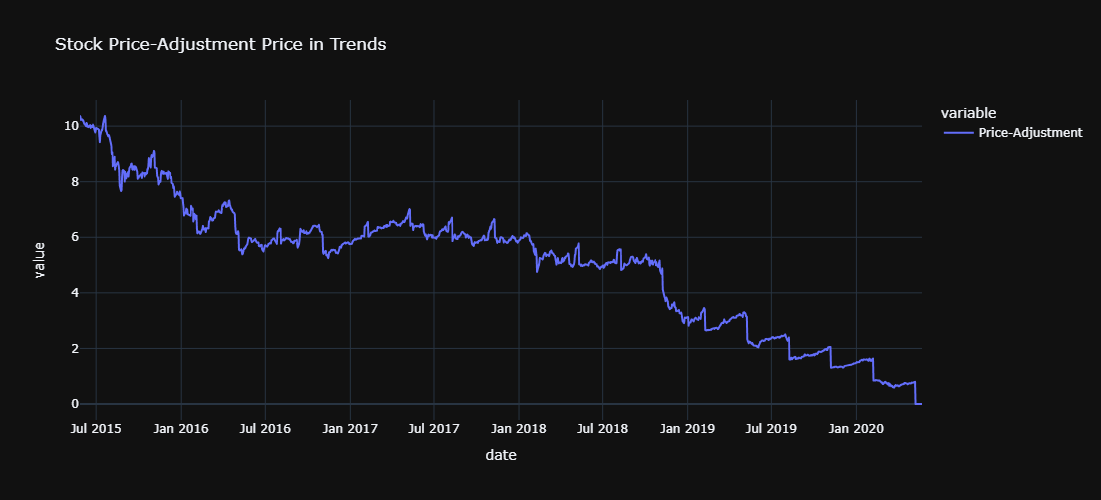

In [866]:
fig=ex.line(df, y=['Price-Adjustment'], title='Stock Price-Adjustment Price in Trends', height=500, width=1100)
fig.update_layout(
template='plotly_dark'
)

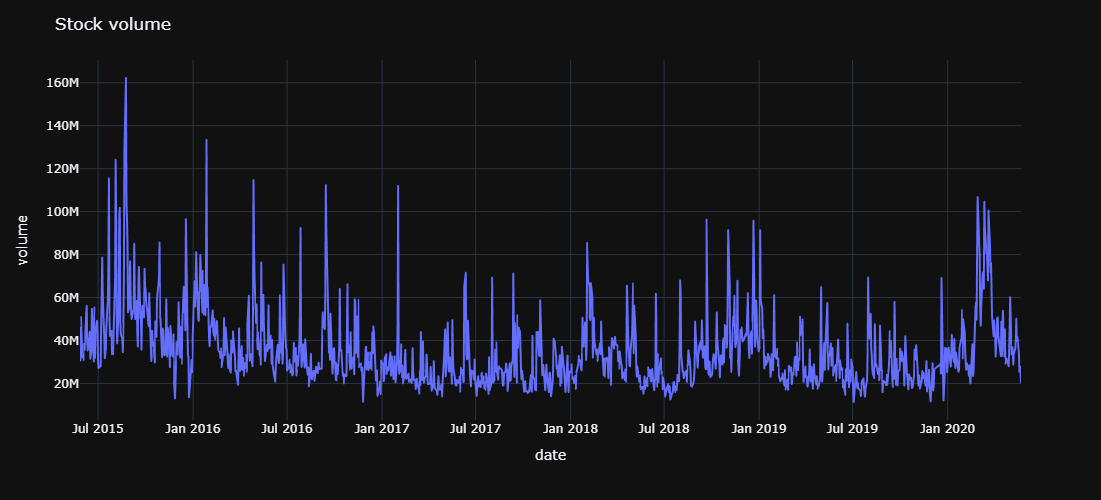

In [867]:
fig = ex.line(df, y='volume', height=500, width=1100)

fig.update_layout(
    template='plotly_dark',
    title_text="Stock volume ",  


)

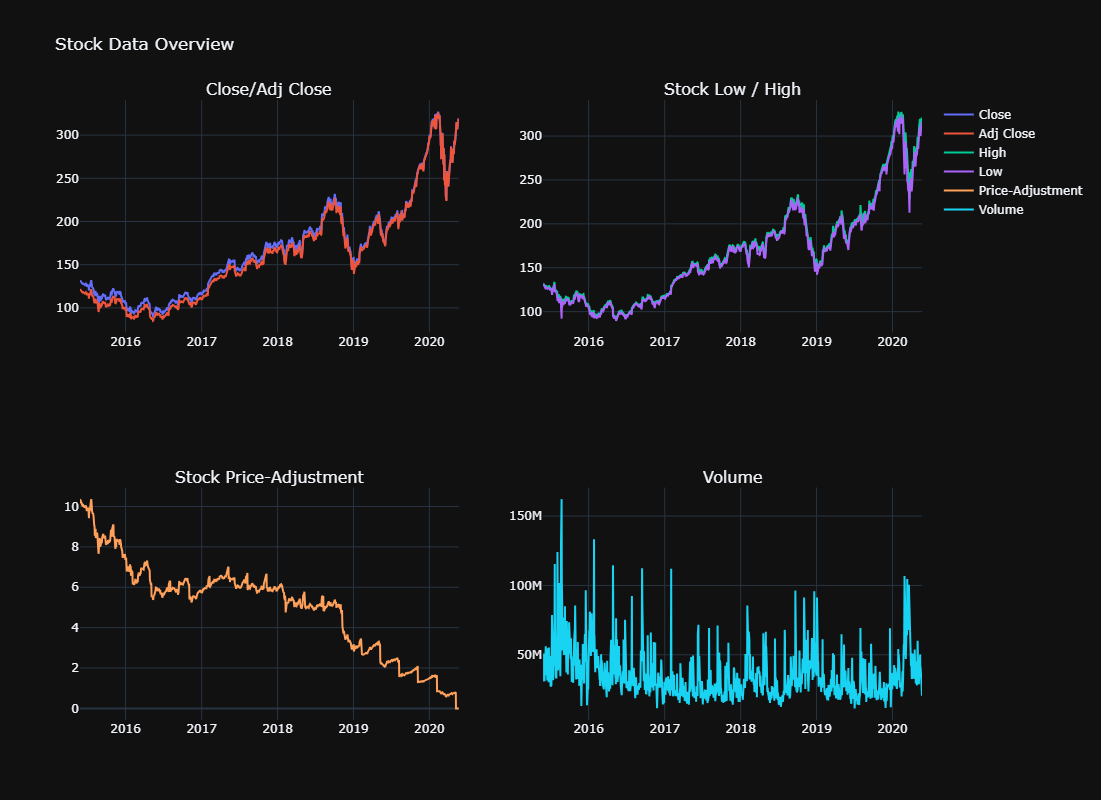

<Figure size 640x480 with 0 Axes>

In [868]:

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=['Close/Adj Close', 'Stock Low / High', 'Stock Price-Adjustment', 'Volume'],
)

fig.add_trace(go.Scatter(x=df.index, y=df['close'], mode='lines', name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['adjClose'], mode='lines', name='Adj Close'), row=1, col=1)

fig.add_trace(go.Scatter(x=df.index, y=df['high'], mode='lines', name='High'), row=1, col=2)
fig.add_trace(go.Scatter(x=df.index, y=df['low'], mode='lines', name='Low'), row=1, col=2)

fig.add_trace(go.Scatter(x=df.index, y=df['Price-Adjustment'], mode='lines', name='Price-Adjustment'), row=2, col=1)

fig.add_trace(go.Scatter(x=df.index, y=df['volume'], mode='lines', name='Volume'), row=2, col=2)

fig.update_layout(
    height=800,  
    width=1100,   
    title_text="Stock Data Overview",  
    showlegend=True,  
    template='plotly_dark'  
)

fig.show()
plt.tight_layout()

In [869]:
df[(df.index=='2018-10-03')][['Year_Quarter','Day-name']] #232.07$

Year_Quarter     Day-name
date                                               
2018-10-03 00:00:00+00:00      2018-Q4  3-Wednesday

**2015**:
- Highest (Q2): Strong iPhone 6 and 6 Plus sales, launched in late 2014, drove significant revenue growth. These devices were highly popular due to their larger screen sizes and improved performance.
- Lowest (Q4): Demand typically slows in Q4 due to anticipation for the next product cycle, contributing to lower revenue.
- **2016**:
- Highest (Q1): Reflects strong holiday season sales from late 2015. Products like the iPhone 6s and 6s Plus were performing well in the market.
Lowest (Q3): Consumers delayed purchases in anticipation of new product launches, creating a seasonal sales dip.
- **2017**:
- Highest (Q4): Launch of the iPhone X marked a breakthrough with innovative features like Face ID and OLED displays, generating strong demand.
- Lowest (Q1): Sales softened after the launch of the iPhone 7, with customers waiting for the major redesign in the upcoming iPhone X.
- **2018**:
- Highest (Q3): The launch of iPhone XS, XS Max, and XR boosted sales during this period, driving higher revenues.
- Lowest (Q2): Slow demand in China, combined with global concerns over iPhone sales, negatively impacted performance.
- **2019**:
- Highest (Q4): The iPhone 11 series performed exceptionally well due to its competitive pricing and improvements in battery life and camera technology.
- Lowest (Q2): Weaker performance attributed to a slowdown in demand for previous-generation devices as customers awaited the next launch.
- **2020**:
- Highest (Q4): Introduction of the iPhone 12, Apple’s first 5G-supported phone, created strong consumer demand despite global economic challenges.
Lowest (Q1): COVID-19 disrupted production and sales early in the year, leading to a noticeable dip in revenue.


**Key Factors Driving Quarterly Variations**:
**Product Launches**:
- Apple’s business heavily depends on the success of its product launches, particularly iPhones. Quarters aligned with major launches (e.g., Q3 or Q4) consistently exhibit higher revenues.
- **Economic Factors**:
- External economic conditions like the U.S.-China trade war (2018-2019) and COVID-19 pandemic (2020) had significant impacts on consumer spending and production capacity.
- **Seasonality**:
Q1 typically benefits from strong holiday sales.
Quarters leading up to major launches, such as Q2 or Q3, often see softer performance as customers hold off on purchases.
- **Market Demand**:
Increased competition in global markets, particularly in China, affected sales during lower-performing quarters.


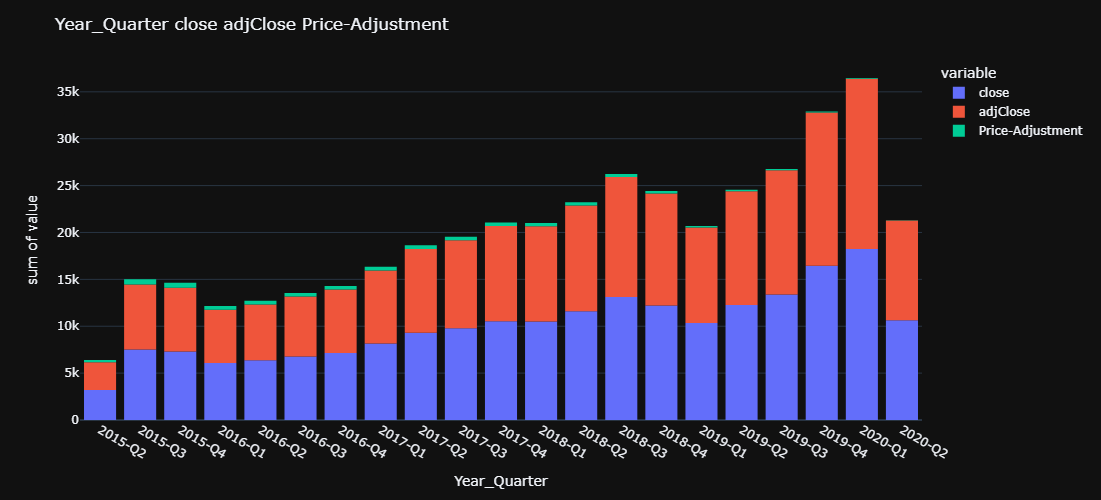

In [870]:
fig = ex.histogram(df,x='Year_Quarter', y=['close','adjClose','Price-Adjustment'], height=500, width=1100)

fig.update_layout(
    template='plotly_dark',
    title_text="Year_Quarter close adjClose Price-Adjustment")

# Let's Take turning point Filtered: Oct 2018 - Jan 2019

### 1. *3/Oct/2018 - $232.07 (High)*
   *Reason: Strong Performance in the Market, Anticipation of New Products*
   - *Q3 2018 Earnings Report*: In October 2018, Apple reported its fiscal Q3 earnings, which showed impressive revenue growth driven by higher-than-expected iPhone sales, strong performance from wearables, and a surge in services like the App Store and iCloud.
   - *Product Launches and Innovation*: Apple had recently launched the iPhone XS, XS Max, and XR models in September 2018, which were well-received by the market. The anticipation of new products and innovations like Apple's evolving ecosystem often generates investor optimism.
   - *Market Sentiment*: At the time, Apple was viewed as a stable, high-performing tech stock, and investors were willing to pay a premium for its - shares, pushing up the stock price.



### 2. *3/Jan/2019 - $142.19 (Low)*

   - *China’s Economic Slowdown*: Economic slowdown in China, which is a major market for Apple, and the ongoing trade tensions between the U.S. and China likely affected Apple's sales and investor sentiment. The drop in stock price reflects a loss of confidence in Apple's growth prospects.
   - *General Market Volatility*: The broader market was experiencing increased volatility during this period, partly due to concerns about the global economy, trade wars, and uncertainty over interest rates, all of which contributed to a broad sell-off in tech stocks

In [871]:
filtered_df = df[(df.index >= '2018-10-03') & (df.index <= '2019-01-03')]


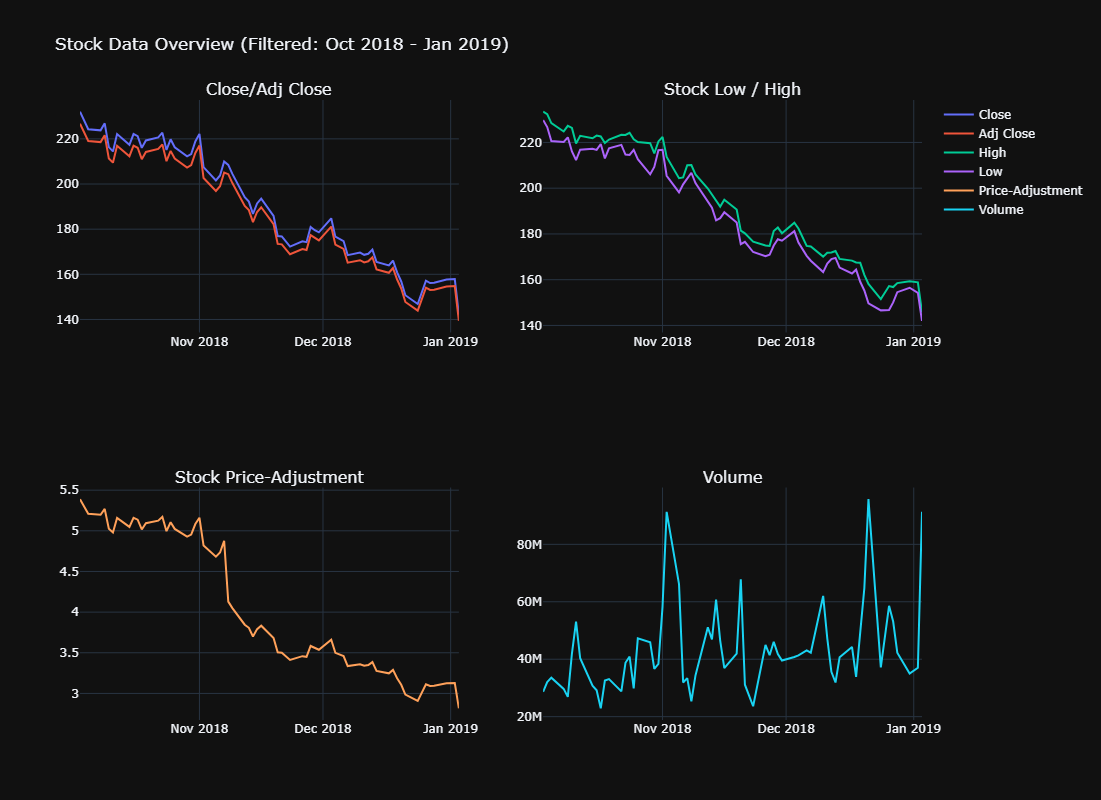

<Figure size 640x480 with 0 Axes>

In [872]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=['Close/Adj Close', 'Stock Low / High', 'Stock Price-Adjustment', 'Volume'],
)

fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['close'], mode='lines', name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['adjClose'], mode='lines', name='Adj Close'), row=1, col=1)

fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['high'], mode='lines', name='High'), row=1, col=2)
fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['low'], mode='lines', name='Low'), row=1, col=2)

fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['Price-Adjustment'], mode='lines', name='Price-Adjustment'), row=2, col=1)

# Adding Volume trace
fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['volume'], mode='lines', name='Volume'), row=2, col=2)

fig.update_layout(
    height=800,
    width=1100,
    title_text="Stock Data Overview (Filtered: Oct 2018 - Jan 2019)",
    showlegend=True,
    template='plotly_dark'
)

fig.show()
plt.tight_layout()

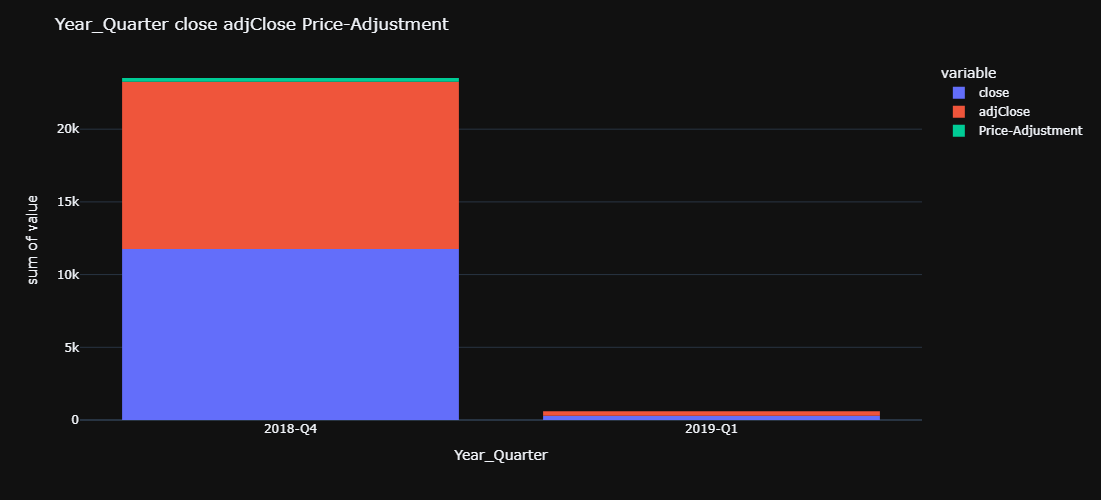

In [873]:
fig = ex.histogram(filtered_df,x='Year_Quarter', y=['close','adjClose','Price-Adjustment'], height=500, width=1100)

fig.update_layout(
    template='plotly_dark',
    title_text="Year_Quarter close adjClose Price-Adjustment")

### 3. *12/Feb/2020 - $327.2 (High)*
   *Reason: Strong Performance, Services Growth, and Market Optimism*
   - *Strong Financial Results*: By February 2020, Apple was riding high on solid Q1 2020 earnings. The company reported significant growth in services revenue (App Store, iCloud, Apple Music) and wearables (AirPods, Apple Watch), which helped offset slowing iPhone sales.
   - *Market Sentiment*: Apple’s stock was benefiting from strong investor confidence, not only in its hardware but also in its growing services business, which provided more consistent, recurring revenue streams. The stock was also benefiting from broader optimism in the stock market.
   - *Innovation and Product Development*: The launch of products like the Apple Watch and AirPods were gaining traction in the market. In addition, Apple was continuing to focus on increasing its services revenue, which helped diversify its income streams beyond just hardwares.s.


## 4. *23/Mar/2020 - $224.37 (Low)*: 
   - COVID-19 pandemic caused global market panic.
   - Supply chain disruptions and uncertainty about future sales.

In short, highs were driven by strong financials and optimism, while lows were due to external factors like economic concerns and the pandemic.

In [874]:
filtered_df = df[(df.index >= '2020-02-12') & (df.index <= '2020-03-23')]


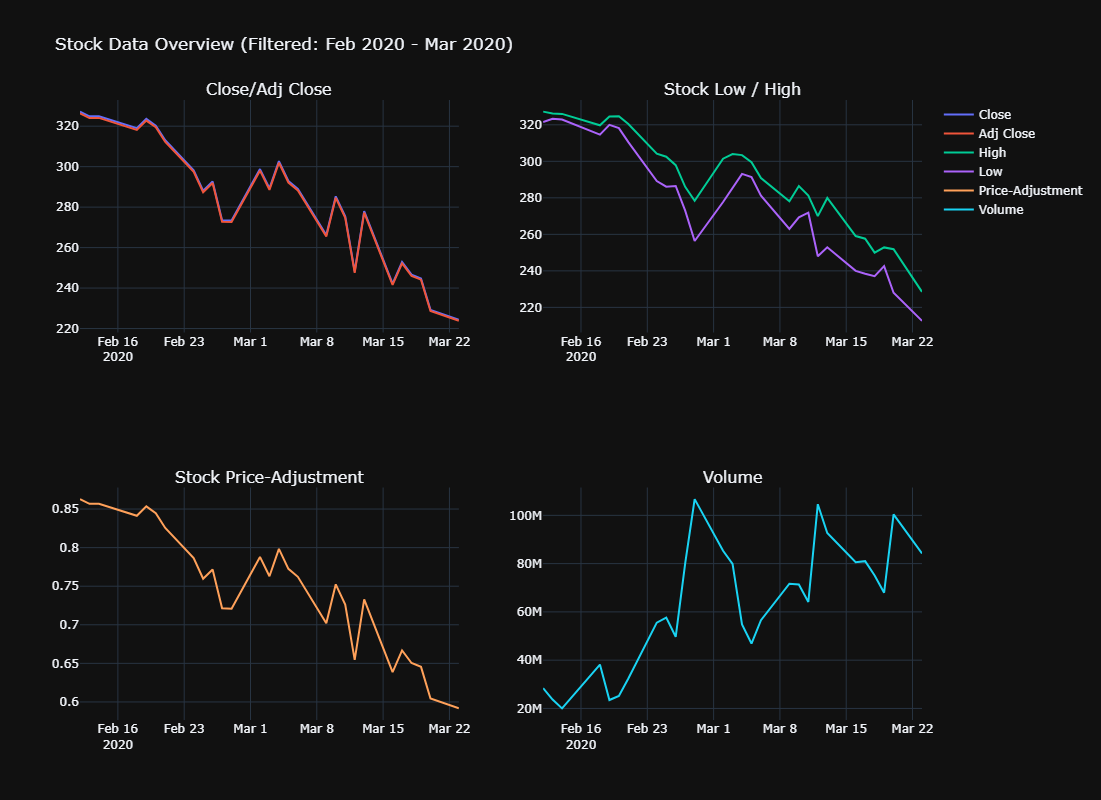

In [875]:

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=['Close/Adj Close', 'Stock Low / High', 'Stock Price-Adjustment', 'Volume'],
)

# Adding Close and Adj Close traces
fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['close'], mode='lines', name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['adjClose'], mode='lines', name='Adj Close'), row=1, col=1)

# Adding High and Low traces
fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['high'], mode='lines', name='High'), row=1, col=2)
fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['low'], mode='lines', name='Low'), row=1, col=2)

# Adding Price Adjustment trace
fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['Price-Adjustment'], mode='lines', name='Price-Adjustment'), row=2, col=1)

# Adding Volume trace
fig.add_trace(go.Scatter(x=filtered_df.index, y=filtered_df['volume'], mode='lines', name='Volume'), row=2, col=2)

# Updating layout
fig.update_layout(
    height=800,
    width=1100,
    title_text="Stock Data Overview (Filtered: Feb 2020 - Mar 2020)",
    showlegend=True,
    template='plotly_dark'
)

# Displaying the plot
fig.show()


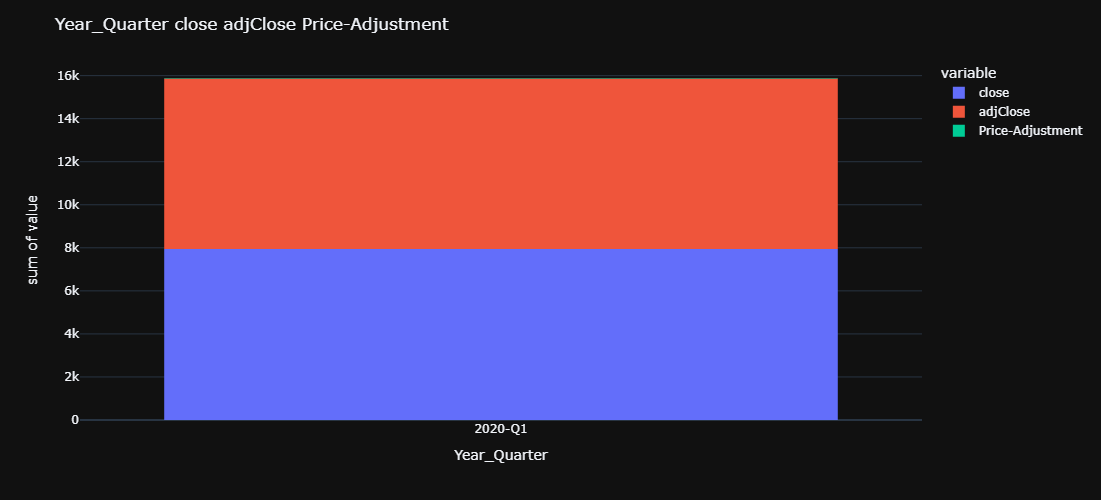

In [876]:
fig = ex.histogram(filtered_df,x='Year_Quarter', y=['close','adjClose','Price-Adjustment'], height=500, width=1100)

fig.update_layout(
    template='plotly_dark',
    title_text="Year_Quarter close adjClose Price-Adjustment")

In [877]:
df_q=df.resample('W-MON', kind = 'period').sum(numeric_only=True)


C:\Users\mostafa\AppData\Local\Temp\ipykernel_16100\1360533533.py:1: FutureWarning:

The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead



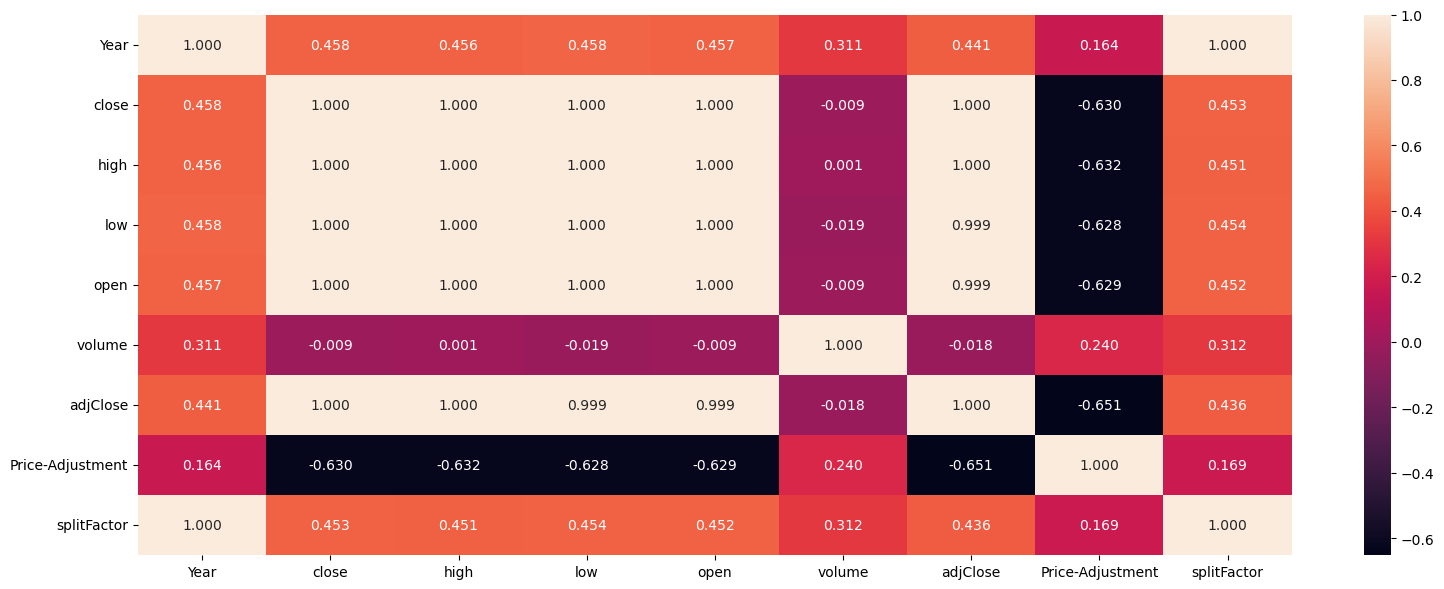

In [878]:
plt.figure(figsize=(16,6))
sns.heatmap(df_q.corr(numeric_only=True),fmt='0.3f',annot=True)
plt.tight_layout()

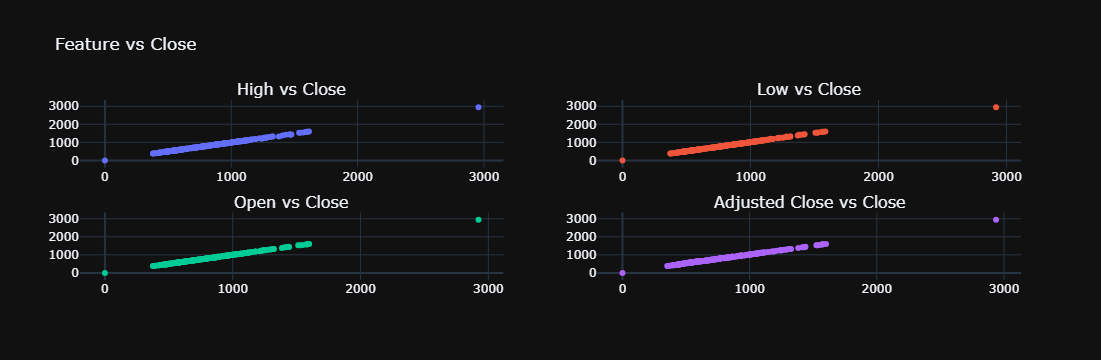

In [879]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("High vs Close", "Low vs Close", "Open vs Close", "Adjusted Close vs Close"))

fig.add_trace(go.Scatter(x=df_q['high'], y=df_q['close'], mode='markers', name='High vs Close'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df_q['low'], y=df_q['close'], mode='markers', name='Low vs Close'),
              row=1, col=2)

fig.add_trace(go.Scatter(x=df_q['open'], y=df_q['close'], mode='markers', name='adjClose vs open'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df_q['adjClose'], y=df_q['close'], mode='markers', name='Adjusted Close vs Close'),
              row=2, col=2)

fig.update_layout(title_text="Feature vs Close", showlegend=False,template='plotly_dark',)

fig.show()


## Normalization

In [880]:
scaler = MinMaxScaler()
df_q_scaled = pd.DataFrame(scaler.fit_transform(df_q), columns=df_q.columns)


In [881]:
df_q_scaled=df_q_scaled.drop(columns=['splitFactor','Year'])

In [882]:
df_q_scaled

close      high       low      open    volume  adjClose  \
0    0.177696  0.178254  0.178575  0.179483  0.361142  0.164579   
1    0.218764  0.220201  0.220459  0.221860  0.433204  0.202616   
2    0.216424  0.217527  0.217527  0.218297  0.478529  0.200448   
3    0.215750  0.216428  0.217200  0.217988  0.426805  0.199824   
4    0.214710  0.216817  0.216747  0.217817  0.476916  0.198861   
..        ...       ...       ...       ...       ...       ...   
256  0.469319  0.475001  0.469295  0.473745  0.377101  0.470448   
257  0.488523  0.494709  0.487511  0.490997  0.456359  0.489698   
258  0.517221  0.519767  0.516374  0.517439  0.387758  0.519027   
259  0.525418  0.530934  0.523006  0.529594  0.466001  0.528075   
260  0.429511  0.432288  0.431935  0.433163  0.225045  0.431683   

     Price-Adjustment  
0            0.812275  
1            1.000000  
2            0.989302  
3            0.986221  
4            0.981467  
..                ...  
256          0.072090  
257          0.075040  
258          0.046924  
259          0.000000  
260          0.000000  

[261 rows x 7 columns]

In [883]:
df_q_scaled.corr()['close']

close               1.000000
high                0.999839
low                 0.999872
open                0.999895
volume             -0.009306
adjClose            0.999598
Price-Adjustment   -0.629566
Name: close, dtype: float64

## Feature Engineering

## **Aggregation and Transformation of Highly Correlated Features**

In [884]:
# Create average price and price range
df_q_scaled['avg_price'] = (df_q_scaled['high'] + df_q_scaled['low'] + df_q_scaled['open']) / 3
df_q_scaled['price_range'] = df_q_scaled['high'] - df_q_scaled['low']
df_q_scaled['open_close_diff'] = df_q_scaled['open'] - df_q_scaled['close']
df_q_scaled = df_q_scaled.drop(['high', 'low', 'open', 'adjClose'], axis=1) 


In [885]:
df_q_scaled.corr()['close']

close               1.000000
volume             -0.009306
Price-Adjustment   -0.629566
avg_price           0.999955
price_range         0.357102
open_close_diff     0.303500
Name: close, dtype: float64

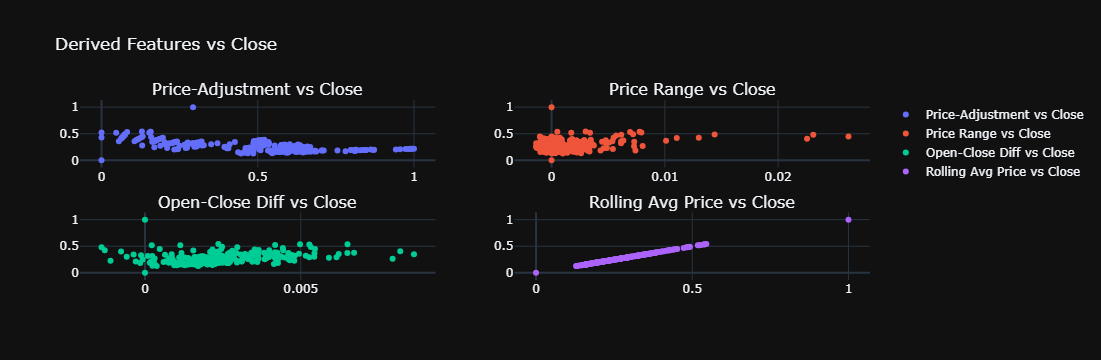

In [886]:
fig = make_subplots(rows=2, cols=2, subplot_titles=(
    "Price-Adjustment vs Close", 
    "Price Range vs Close", 
    "Open-Close Diff vs Close", 
    "Rolling Avg Price vs Close"
))

# Add scatter plots for each feature vs target (close)
fig.add_trace(go.Scatter(x=df_q_scaled['Price-Adjustment'], y=df_q_scaled['close'], mode='markers', name='Price-Adjustment vs Close'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=df_q_scaled['price_range'], y=df_q_scaled['close'], mode='markers', name='Price Range vs Close'),
              row=1, col=2)

fig.add_trace(go.Scatter(x=df_q_scaled['open_close_diff'], y=df_q_scaled['close'], mode='markers', name='Open-Close Diff vs Close'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df_q_scaled['avg_price'], y=df_q_scaled['close'], mode='markers', name='Rolling Avg Price vs Close'),
              row=2, col=2)

fig.update_layout(
    title_text="Derived Features vs Close", 
    showlegend=True,
    template='plotly_dark'
)

# Display the plot
fig.show()


## **Prepare the Dataset For Split**

In [887]:
X = df_q_scaled.drop(columns=['close', 'Price-Adjustment', 'volume','open_close_diff'])  # Features
y = df_q_scaled['close']  # Target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)



## **Train the Random Forest Regressor**

In [888]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## **Make Predictions**

In [889]:
# Predict on the Test Set
y_pred = rf_model.predict(X_test)


## **Actual vs Predicted**

In [890]:
# Create DataFrame for Comparison
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}).reset_index(drop=True)

comparison_df


Actual  Predicted
0    0.145875   0.149849
1    0.294633   0.289887
2    0.303253   0.296562
3    0.198445   0.198213
4    0.322227   0.320148
..        ...        ...
204  0.289675   0.287933
205  0.193016   0.193435
206  0.344202   0.341564
207  0.198411   0.197955
208  0.447740   0.442549

[209 rows x 2 columns]

## **Evaluate the Model**

In [891]:
# Calculate Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Evaluation Metrics
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"R-squared (R2): {r2:.6f}")


Mean Squared Error (MSE): 0.001369
Mean Absolute Error (MAE): 0.007660
R-squared (R2): 0.880270


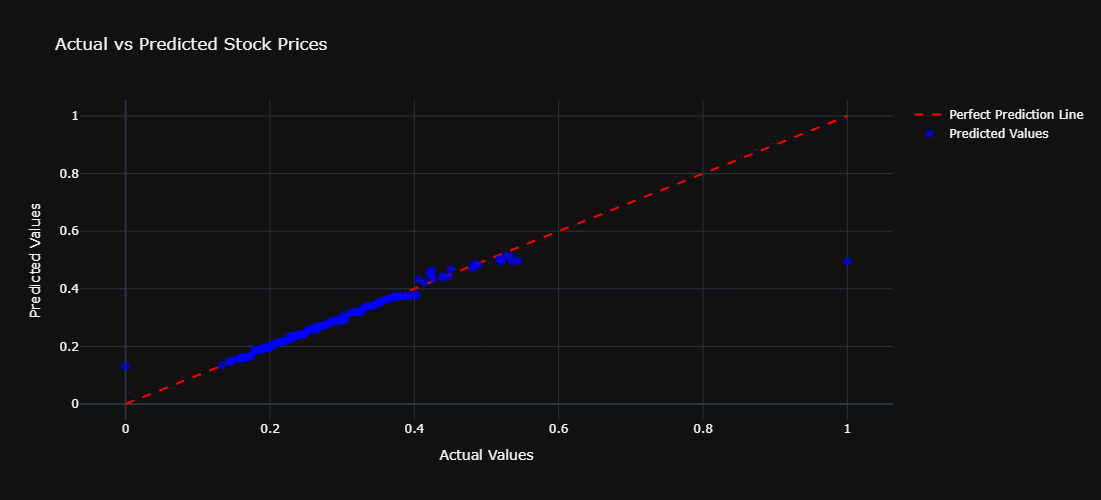

<Figure size 640x480 with 0 Axes>

In [892]:
fig = go.Figure()

# Add perfect prediction line
fig.add_trace(go.Scatter(
    x=[min(y_test), max(y_test)],
    y=[min(y_test), max(y_test)],
    mode='lines',
    name='Perfect Prediction Line',
    line=dict(color='red', dash='dash', width=2)
))

# Add predicted values as scatter points
fig.add_trace(go.Scatter(
    x=y_test,
    y=y_pred,
    mode='markers',
    name='Predicted Values',
    marker=dict(color='blue', size=8, opacity=0.7)
))

# Update layout
fig.update_layout(
    title='Actual vs Predicted Stock Prices',
    xaxis_title='Actual Values',
    yaxis_title='Predicted Values',
    template='plotly_dark',  # Dark theme
    width=1100,              # Adjusted width
    height=500               # Adjusted height
)

# Show the plot
fig.show()
plt.tight_layout()

## ----------------------------------------*A7la 3la A7la*-------------------------------------------------

## -----------------------------------------------*Thank's*-------------------------------------------------